# REGRESIÓN LINEAL

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Elegir el modelo según el gráfico de dispersión

-Si es lineal: cambios iguales en 'x' y 'y'.

-Modelos potenciales: cambios pequeños en 'x' producen cambios grandes en 'y' y visceversa.

-Modelos exponenciales: los datos describen una curva concava hacia arriba.

-Modelo logarítmico: los datos describen una curva concava hacia abajo.

In [ ]:
#si uno se equivoca de modelo, pueden tener valores errados

#para exponencial y (cosumo) va en logaritmo y x (ingreso) va normal

#los parámetros son el valor a estimar y la pendiente

#lo minimo que una familia necesita para vivir es (intersseccion con y) y por cada incremento que me haga cuanto se dedica al consumo y cuánto a otras cosas

#hay que interpretar la ecuación

## Pasos para el análisis de un modelo

1. Estadística descriptiva
2. Coeficicentes r y r^2
3. Diagramas de dispersión
4. Estimación de parámetros
5. Estimación de modelo
6. Interpretar parámetros
7. ¿Cómo pronosticar?

## MODELO: Ingreso (x) / Consumo (y)

Trata de estimar o predecir la variable del consumo 'y' basados en la variable del ingreso 'x' y visceversa.

## Paso 1: Analizar asociación entre variables con estadística descriptiva.

1.1. Se realiza un diagrama de dispersión.

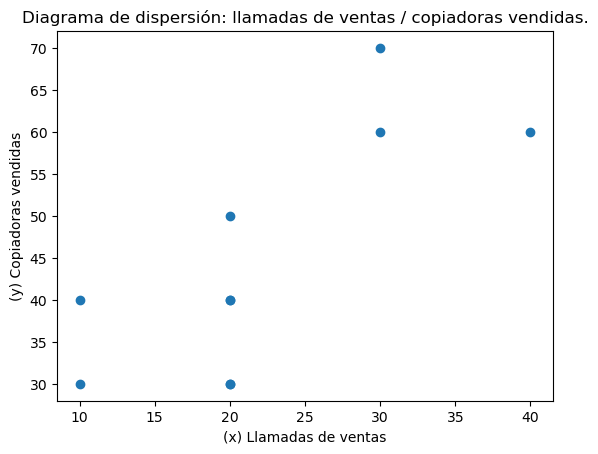

In [23]:
###---DATOS---###
#ejemplo 11.4 pág. 332 Estadistica aplicada - WEBSTER

#x = np.array([10,12,8,17,10,15,10,14,19,10,11,13,16,10,12])
#y = np.array([15,17,13,23,16,21,14,20,24,17,16,18,23,15,16])
#eje_x = 'Publicidad'
#eje_y = 'Pasajeros'

#ejemplo pág. 466 Estadística aplicada - LIND

x = np.array([20,40,20,30,10,10,20,20,20,30])
y = np.array([30,60,40,60,30,40,40,50,30,70])
eje_x = 'Llamadas de ventas'
eje_y = 'Copiadoras vendidas'

#ejemplo CLASE APLICADA

#x = np.array([70,65,90,95,110,115,120,140,155,150])
#y = np.array([80,100,120,140,160,180,200,220,240,260])
#eje_x = 'Ingreso'
#eje_y = 'Consumo'

###---DIAGRAMA DE DISPERSIÓN---###

plt.title('Diagrama de dispersión: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
plt.xlabel('(x) {}'.format(eje_x))
plt.ylabel('(y) {}'.format(eje_y))
plt.scatter(x, y) #gráfico de dispersión
plt.show() #for clean output

1.2. Se calcula e interpretan algunos coeficientes como: coeficiente de variación (CV), error estándar de estimación (Se), error estándar de regresión (Sb), correlación bivariada (r), determinación bivariada (R2), para evaluar la capacidad predictiva de el modelo estudiado.

In [31]:
#mean_x = media de x
#mean_y = media de y
#std_x = desviación std. de x
#std_y = desviación std. de y
#cv_x = coef. variación x
#cv_y = coef. variación y
#SCx = suma de cuadrados de x
#SCy = suma de cuadrados de y
#SCxy = suma de los productos cruzados x, y
#SCE = suma de cuadrados del error
#CME = cuadrado medio del error
#Se = error estandar de estimación
#Sb = error estandar de regresión
#int_conf = intervalos de confianza
#int_pre = intervalos de predicción

mean_x, mean_y = np.mean(x), np.mean(y)
std_x, std_y = np.std(x, ddof=1), np.std(y, ddof=1)
cv_x, cv_y = (np.std(x, ddof=1) / mean_x) * 100, (np.std(y, ddof=1) / mean_y) * 100

#interpretación CV_x
print('Coeficiente de variación: {} (x) = {:.2f}%'.format(eje_x, cv_x))
if cv_x <= 30:
    print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(eje_x.lower()))
elif cv_x > 30 and cv_x < 50:
    print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(eje_x.lower()))
elif cv_x > 50:
    print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(eje_x.lower()))

#interpretación CV_y
print('\nCoeficiente de variación: {} (y) = {:.2f}%'.format(eje_y, cv_y))
if cv_y <= 30:
    print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(eje_y.lower()))
elif cv_y > 30 and cv_y < 50:
    print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(eje_y.lower()))
elif cv_y > 50:
    print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(eje_y.lower()))

SCx = sum(x ** 2) - ((sum(x) ** 2) / len(x))
SCy = sum(y ** 2) - ((sum(y) ** 2) / len(y))
SCxy = sum(x*y) - (sum(x) * sum(y)) / len(x)

#m
pendiente = SCxy / SCx

#b
interseccion = mean_y - (pendiente * mean_x)

###---CALCULO DE (r)---###
r = SCxy / np.sqrt(SCx * SCy)
print('\nr = {:.3f}'.format(r))
###---INTERPRETACIÓN DE (r)---###
if r > 0:
    if r > 0.5:
        print('Existe una correlación positiva fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
    else:
        print('Existe una correlación positiva débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
elif r < 0:
    if r < -0.5:
        print('Existe una correlación negativa fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
    else:
        print('Existe una correlación negativa débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
else:
    print('No existe ninguna correlación entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))

###---CALCULO DE (R^2)---###
R2 = (SCxy ** 2) / (SCx * SCy)
print('\nR^2 = {:.3f}'.format(R2))
###---INTERPRETACION DE (R2)---###
print('El {:.0f}% del cambio en la cantidad de {} se explica mediante\nun cambio en la cantidad de {}.'.format((R2*100), eje_y.lower(), eje_x.lower()))

Coeficiente de variación: Llamadas de ventas (x) = 41.77%
Los valores de la variable llamadas de ventas son un poco heterogéneos;
MUESTRA POCO REPRESENTATIVA.

Coeficiente de variación: Copiadoras vendidas (y) = 31.86%
Los valores de la variable copiadoras vendidas son un poco heterogéneos;
MUESTRA POCO REPRESENTATIVA.

r = 0.759
Existe una correlación positiva fuerte entre llamadas de ventas y copiadoras vendidas.

R^2 = 0.576
El 58% del cambio en la cantidad de copiadoras vendidas se explica mediante
un cambio en la cantidad de llamadas de ventas.


## Paso 2: Validez del modelo.

In [ ]:
#intervalos de confianza e intervalos de prediccion

## Paso 3: Hallar la ecuación y la recta de mejor ajuste.

3.1. Mínimos cuadrados ordinarios: la recta de mejor ajuste

In [25]:
###---LA RECTA DE MEJOR AJUSTE---###

#m
pendiente = SCxy / SCx

#b
interseccion = mean_y - (pendiente * mean_x)

print('La pendiente de la recta de regresión es: {:.2f}.'.format(pendiente))

print('La interseccion de la recta con el eje y ocurre en el punto: (0, {:.2f})'.format(interseccion))

#ecuación de la recta
print('La ecuación de la recta es Y = {:.2f} + {:.2f}X'.format(interseccion, pendiente))

La pendiente de la recta de regresión es: 1.18.
La interseccion de la recta con el eje y ocurre en el punto: (0, 18.95)
La ecuación de la recta es Y = 18.95 + 1.18X


## Paso 4: Gráfica de la recta de la regresión lineal.

In [ ]:
#create basic scatterplot
plt.plot(x, y, 'o') #'o' is for dots; 'ro' is for red dots

#add linear regression line to scatterplot 
plt.title('Regresión lineal: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
plt.xlabel('(x) {}'.format(eje_x))
plt.ylabel('(y) {}'.format(eje_y))
plt.plot(x, pendiente*x+interseccion) #y=m*x+b
plt.show() #for clean output

## Paso 5: Pronosticar.

In [ ]:
def estimar_valor():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (pendiente * x_estimado) + interseccion
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada {} llamadas realizadas, sean vendidas {:.2f} copiadoras según la regresión lineal.'.format(x_estimado, y_estimado))

    x = np.array(x)
    y = np.array(y)

    #Gráfico
    plt.title('Estimación: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
    plt.plot(x, y, 'go') #'o' is for dots; 'ro' is for red dots

estimar_valor()